In [1]:
import cv2
import numpy as np

In [2]:
# New import path for ascent image
from scipy.datasets import ascent

# Load the sample image and convert to float32 for processing
i = ascent().astype(np.float32)

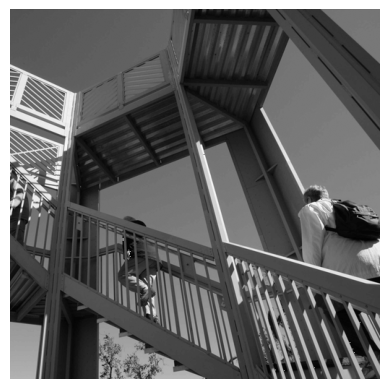

In [3]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [4]:
#copying it into a numpy array to allow for easire manipulation
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


In [5]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [6]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

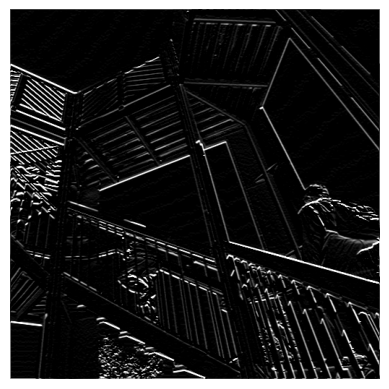

In [7]:
# Plot the image. Note the size of the axes -- they are 512 by 512
import matplotlib.pyplot as plt

# Ensure pixel values are in the valid 0-255 range and convert to uint8 for display
#np.clip(...) ensures all pixel values are between 0 and 255 (safe for 8-bit images).
#.astype(np.uint8) converts the data type so it's display-friendly.
#plt.axis('off') hides axis labels for a cleaner image view.
i_transformed = np.clip(i_transformed, 0, 255).astype(np.uint8)

# Plot the transformed image
plt.gray()
plt.grid(False)
plt.axis('off')
plt.imshow(i_transformed)
plt.show()

In [2]:
import tensorflow as tf

# Define a callback to stop training early once accuracy exceeds 99.8%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.998:
            print("\nReached 99.8% accuracy, stopping training...")
            self.model.stop_training = True  # Correct spelling

# Instantiate the callback
callbacks = myCallback()

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype("float32") / 255.0

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# Train the model with the callback
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])


D:\School\Project\MErchine LEarning\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9048 - loss: 0.3096
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9833 - loss: 0.0569
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9895 - loss: 0.0326
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9935 - loss: 0.0229
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9949 - loss: 0.0144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9973 - loss: 0.0084
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9976 - loss: 0.0078
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9979 - loss: 0.0062
Epoch 9/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9982 - loss: 0.0050
Reached 99.8% accuracy, stopping training...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9982 - loss: 0.0050
